In [21]:
import sqlite3 as sqlite
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
db = 'im.db'
conn = sqlite.connect(db)
df = pd.read_sql("""SELECT 
                * 
            
            FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
            """, conn)

In [4]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [5]:
df.genres = df.genres.map(lambda x: x.split(',') if type(x) == str else x)

In [6]:
exploded_df_genres = df.explode('genres')
#describe of avg_rating of all movies
exploded_df_genres.averagerating.describe()

count    129294.000000
mean          6.303352
std           1.458034
min           1.000000
25%           5.400000
50%           6.400000
75%           7.300000
max          10.000000
Name: averagerating, dtype: float64

In [7]:
genres_means = exploded_df_genres[exploded_df_genres.numvotes >= 50].groupby('genres').mean(numeric_only=True)
#describe of avg_rating of 'News'
news_rating = exploded_df_genres[exploded_df_genres.genres == 'News'].averagerating
news_rating.describe()

count    579.000000
mean       7.271330
std        0.999155
min        2.000000
25%        6.700000
50%        7.300000
75%        7.950000
max        9.400000
Name: averagerating, dtype: float64

In [8]:
stats.ttest_1samp(news_rating, popmean=6.303)

TtestResult(statistic=23.320054806251232, pvalue=2.7926806633355435e-85, df=578)

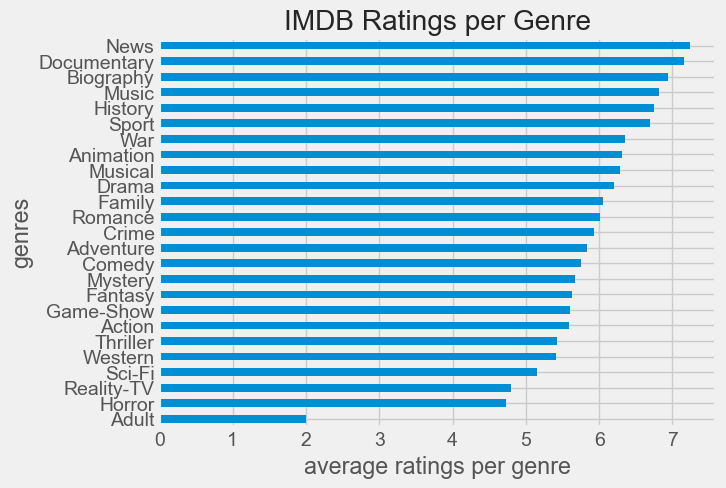

In [145]:
genres_means.averagerating.sort_values(ascending=True).plot(kind='barh',
                                                           xlabel = 'average ratings per genre',
                                                           title = 'IMDB Ratings per Genre');

In [10]:
genre_ids_dict = {
    "28": 'Action',
    "12": 'Adventure',
    "16": 'Animation',
    "35": 'Comedy',
    "80": 'Crime',
    "99": 'Documentary',
    "18": 'Drama',
    "10751": 'Family', 
    "14": 'Fantasy',
    "36": 'History',
    "27": 'Horror',
    "10402": 'Music',
    "9648": 'Mystery',
    "10749": 'Romance',
    "878": 'Science Fiction',
    "10770": 'TV Movie', 
    "53": 'Thriller',
    "10752": 'War',
    "37": 'Western'
}

In [11]:
#tn budgets dataset
budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")

##  Joins tn movie budgets dataset with imdb movie basics dataset

In [12]:
#merge budgets with imdb
budget_join_imdb = budgets.merge(df, how='inner', left_on = 'movie', right_on = 'primary_title')

#turn strings into numbers
budget_join_imdb.production_budget = budget_join_imdb.production_budget.map(lambda x: int(x.strip("$").replace(',', '')))
budget_join_imdb.domestic_gross = budget_join_imdb.domestic_gross.map(lambda x: int(x.strip("$").replace(',', '')))
budget_join_imdb.worldwide_gross = budget_join_imdb.worldwide_gross.map(lambda x: int(x.strip("$").replace(',', '')))


Creates roi row.

roi = gross / budget

In [13]:

budget_join_imdb['roi'] = budget_join_imdb.worldwide_gross / budget_join_imdb.production_budget

Explodes each movie row by genre

In [39]:
exploded_roi = budget_join_imdb[['genres', 'roi', 'movie', 'averagerating']].explode('genres')
exploded_roi

,genres,roi,movie,averagerating
0,Horror,6.532577,Avatar,6.1
1,Action,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
1,Adventure,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
1,Fantasy,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
2,Action,0.427892,Dark Phoenix,6.0
...,...,...,...,...
2873,Sci-Fi,0.000000,Red 11,5.6
2873,Thriller,0.000000,Red 11,5.6
2874,Drama,0.000000,A Plague So Pleasant,5.4
2874,Horror,0.000000,A Plague So Pleasant,5.4


## ROI bar chart 

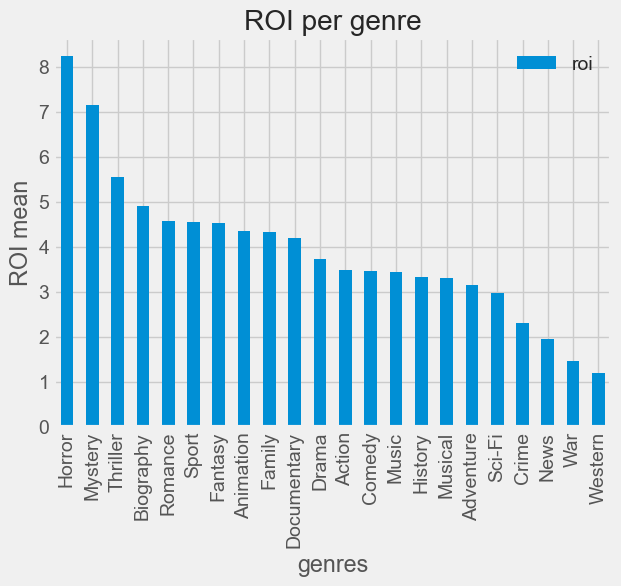

In [23]:

exploded_roi.groupby('genres').mean(numeric_only = True).sort_values(by = 'roi', ascending=False).plot(kind = 'bar',
                                                                                                      ylabel = 'ROI mean',
                                                                                                      title = 'ROI per genre');

## Number of movies per genre with roi > 50 

In [16]:

exploded_roi[exploded_roi['roi'] > 50].genres.value_counts()

genres
Drama          15
Horror         10
Thriller        9
Romance         4
Mystery         4
Comedy          3
Sport           3
Action          3
Family          2
Fantasy         2
Biography       2
Crime           2
Documentary     2
Adventure       1
Animation       1
History         1
Name: count, dtype: int64

In [43]:
exploded_roi

,genres,roi,movie,averagerating
0,Horror,6.532577,Avatar,6.1
1,Action,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
1,Adventure,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
1,Fantasy,2.546673,Pirates of the Caribbean: On Stranger Tides,6.6
2,Action,0.427892,Dark Phoenix,6.0
...,...,...,...,...
2873,Sci-Fi,0.000000,Red 11,5.6
2873,Thriller,0.000000,Red 11,5.6
2874,Drama,0.000000,A Plague So Pleasant,5.4
2874,Horror,0.000000,A Plague So Pleasant,5.4


/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,roi,averagerating
roi,1.000000,-0.484866
averagerating,-0.484866,1.000000


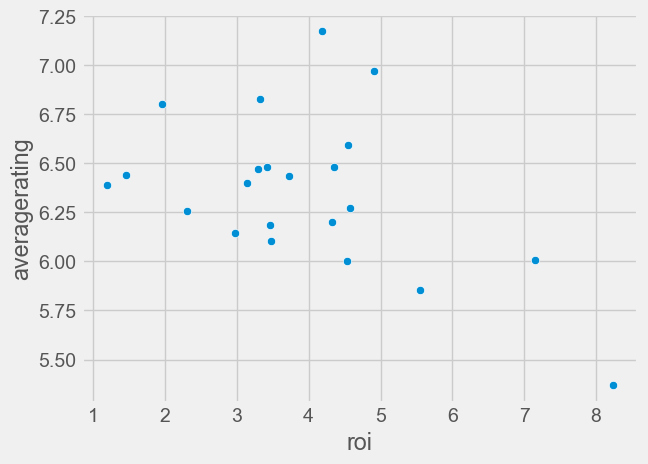

In [52]:
meh = exploded_roi.groupby('genres').mean(numeric_only = True)
sns.scatterplot(data = meh, x = 'roi', y = 'averagerating')
meh.corr(numeric_only = True)

In [61]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep = '\t', encoding = 'unicode_escape')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [60]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [106]:
reviews_info_join = rt_reviews.merge(rt_info, how='left', left_on = 'id', right_on = 'id')
reviews_info_join = reviews_info_join[reviews_info_join['top_critic'] == 1]
reviews_info_join['genre'] = reviews_info_join['genre'].map(lambda x: x.split('|') if type(x) == str else x)
reviews_info_join = reviews_info_join.explode('genre')
fresh_rotten = reviews_info_join.groupby(['genre', 'fresh']).count()['id'] 

In [107]:
fresh_rotten = fresh_rotten.reset_index().pivot(columns='fresh', index = 'genre', values = 'id')

In [109]:
fresh_rotten['fresh_to_rotten'] = fresh_rotten['fresh'] / fresh_rotten['rotten']

In [126]:
fresh_rotten = fresh_rotten.sort_values('fresh_to_rotten', ascending = False)
fresh_rotten

fresh,fresh,rotten,fresh_to_rotten
genre,,,
Gay and Lesbian,9,2,4.500000
Documentary,274,78,3.512821
Art House and International,910,309,2.944984
Sports and Fitness,60,23,2.608696
Classics,275,113,2.433628
Cult Movies,7,3,2.333333
Animation,391,222,1.761261
Special Interest,162,98,1.653061
Drama,5018,3291,1.524765


/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


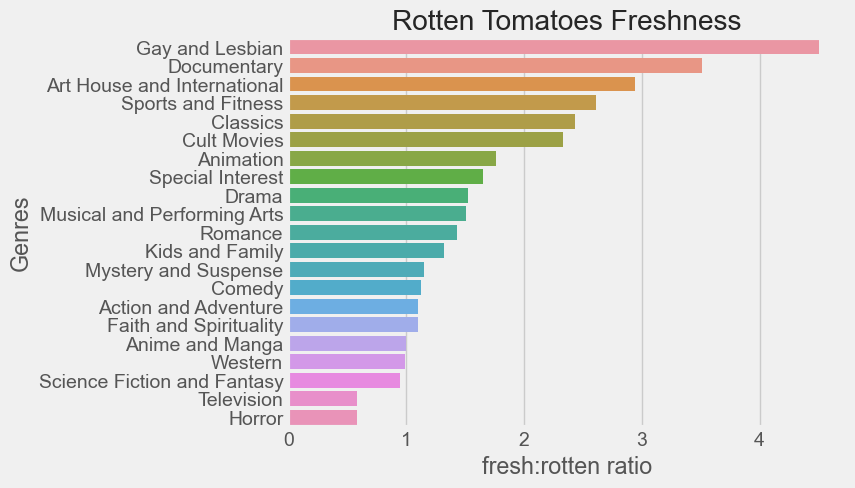

In [160]:
sns.barplot(data = fresh_rotten, y = fresh_rotten.index, x = 'fresh_to_rotten'). \
set(title='Rotten Tomatoes Freshness', xlabel = 'fresh:rotten ratio', ylabel = 'Genres');

In [129]:
reviews_info_join

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012","New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012","New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012","New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012","New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012","New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Art House and International,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Comedy,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Drama,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [144]:
sports = reviews_info_join[['director', 'box_office', 'genre', 'theater_date']].loc[reviews_info_join['genre'] == 'Sports and Fitness']
sports.sample(10)

,director,box_office,genre,theater_date
3040,Ben Younger,"5,051,927",Sports and Fitness,"Nov 18, 2016"
18957,Ted Kotcheff,NaN,Sports and Fitness,"Aug 3, 1979"
2943,Ben Younger,"5,051,927",Sports and Fitness,"Nov 18, 2016"
3038,Ben Younger,"5,051,927",Sports and Fitness,"Nov 18, 2016"
4397,Clint Eastwood,"37,431,431",Sports and Fitness,"Dec 11, 2009"
54374,David Mickey Evans,NaN,Sports and Fitness,"Apr 1, 1993"
3039,Ben Younger,"5,051,927",Sports and Fitness,"Nov 18, 2016"
54375,David Mickey Evans,NaN,Sports and Fitness,"Apr 1, 1993"
43490,Charles Sturridge,NaN,Sports and Fitness,"Jun 1, 1994"
4475,Clint Eastwood,"37,431,431",Sports and Fitness,"Dec 11, 2009"
